In [46]:
import pandas as pd 
import numpy as np
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")

In [48]:
matches = pd.read_csv("./IPL_Matches_2008_2022.csv")
balls= pd.read_csv("./IPL_Ball_by_Ball_2008_2022.csv")
#matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [92]:
matches["Date"] = pd.to_datetime(matches["Date"])

# 1. Total number of matches played

In [42]:
def get_team_details(team_name):
    team_df = matches[(matches["Team1"] == team_name) | (matches["Team2"] == team_name)]
    num_matches_played = team_df.shape[0]
    num_matches_won = team_df[team_df["WinningTeam"] == team_name].shape[0]
    num_tournaments_won = team_df[(team_df["MatchNumber"] == "Final") & (team_df["WinningTeam"] == team_name)].shape[0]
    

    result_df = pd.DataFrame()
    result_df["Metric"] = [ "Number of matches played till date","Number of matches won till date" , "Number of tournaments won till date"]
    result_df["Value"] = [num_matches_played, num_matches_won, num_tournaments_won]
    
    return result_df

get_team_details("Chennai Super Kings")

,Metric,Value
0,Number of matches played till date,208
1,Number of matches won till date,121
2,Number of tournaments won till date,4


In [94]:
team_df = matches[(matches["Team1"] == "Chennai Super Kings") | (matches["Team2"] == "Chennai Super Kings")]
num_matches_played = team_df.shape[0]
num_matches_won = team_df[team_df["WinningTeam"] == "Chennai Super Kings"].shape[0]
num_tournaments_won = team_df[(team_df["MatchNumber"] == "Final") & (team_df["WinningTeam"] == "Chennai Super Kings")].shape[0]

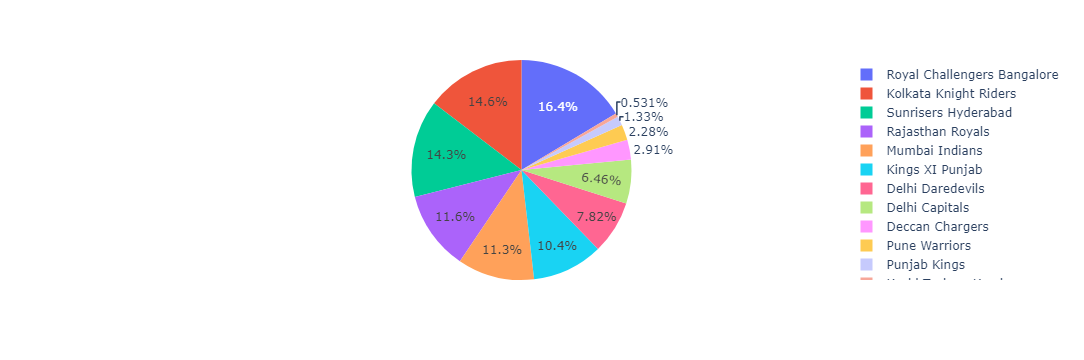

In [47]:
team_df["Opponent"] = team_df.apply(lambda x: x["Team1"] if x["Team2"] == "Chennai Super Kings" else x["Team2"], axis=1)
csk_wins = team_df[team_df["WinningTeam"] == "Chennai Super Kings"]
csk_wins_count = csk_wins.groupby("Opponent")["ID"].count().reset_index()
px.pie(data_frame=csk_wins, names="Opponent", values="ID")

# players strike rate vs average

In [49]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


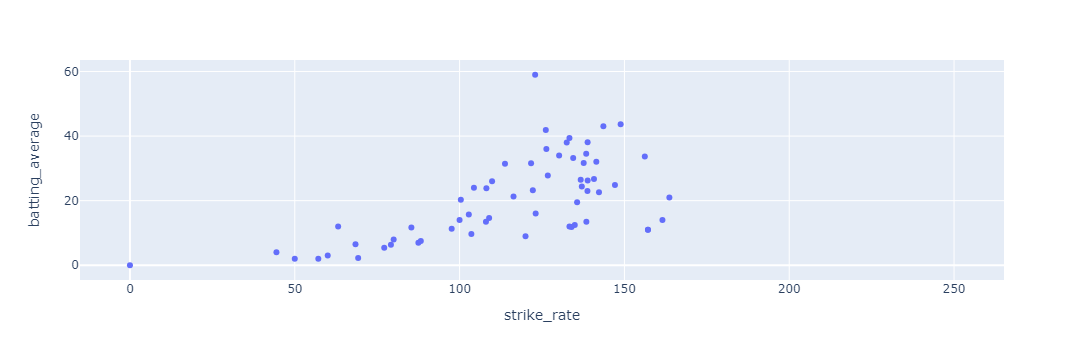

In [64]:
team_df = balls[balls["BattingTeam"] == "Chennai Super Kings"]
total_runs_df = team_df.groupby("batter")["total_run"].sum().reset_index()
total_balls_df = team_df.groupby("batter")["ballnumber"].count().reset_index()
total_dismissals_df = team_df.groupby("batter")["isWicketDelivery"].sum().reset_index()

final_df = total_runs_df.merge(total_balls_df).merge(total_dismissals_df)
final_df["strike_rate"] = round((final_df["total_run"]/ final_df["ballnumber"]) * 100, 2)
final_df["batting_average"] = round(final_df["total_run"] / final_df["isWicketDelivery"], 2)

px.scatter(data_frame=final_df, x="strike_rate", y="batting_average", hover_name="batter")

In [4]:
matches["Team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

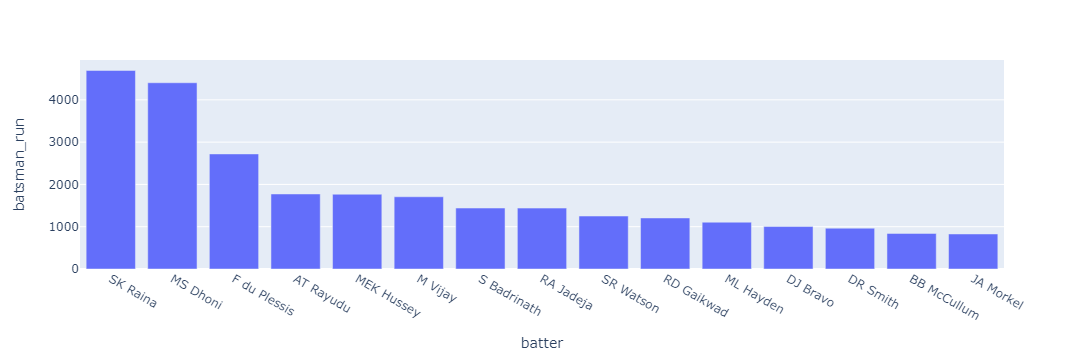

In [82]:
team_df = matches[(matches["Team1"] == "Chennai Super Kings") | (matches["Team2"] == "Chennai Super Kings")]
balls_df = balls[balls["BattingTeam"] == "Chennai Super Kings"]
top_15_batter = balls_df.groupby("batter")["batsman_run"].sum().sort_values(ascending=False).head(15).reset_index()
px.bar(data_frame=top_15_batter, x="batter", y='batsman_run')

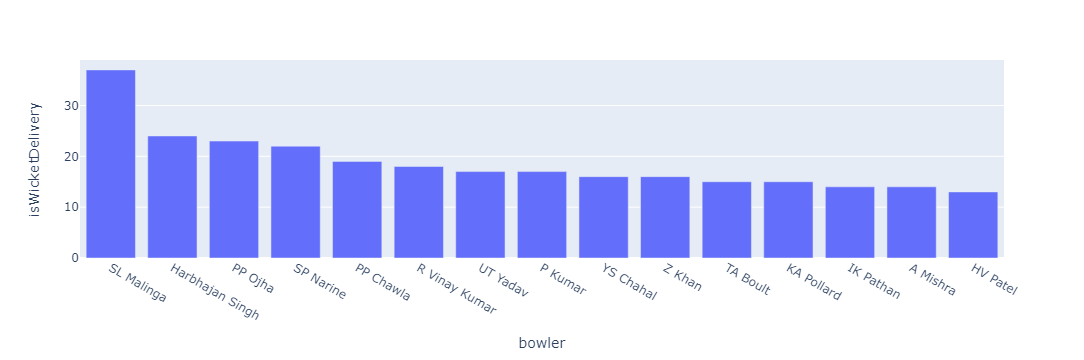

In [83]:
top_15_bowler = balls_df.groupby("bowler")["isWicketDelivery"].sum().sort_values(ascending=False).head(15).reset_index()
px.bar(data_frame=top_15_bowler, x="bowler", y='isWicketDelivery')

# Total runs scored over seasons

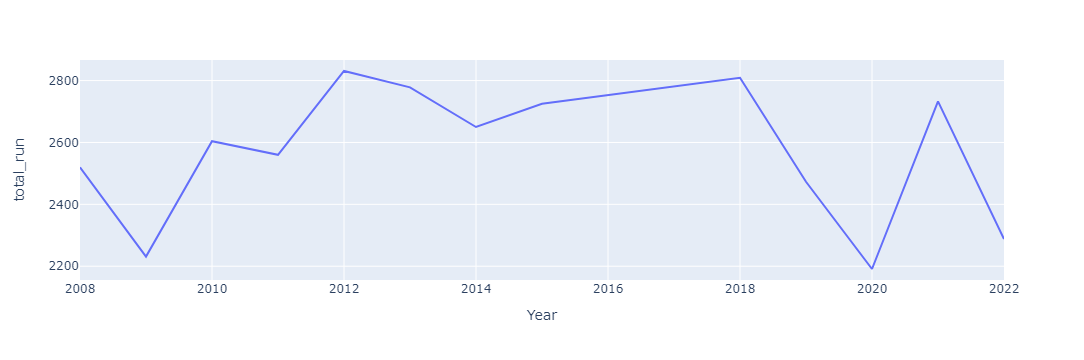

In [104]:
runs_df = team_df.merge(balls_df, on="ID")[["Date", "total_run"]]
runs_df["Year"] = runs_df["Date"].dt.year
temp =runs_df.groupby("Year")["total_run"].sum().reset_index()
px.line(data_frame=temp, x="Year", y="total_run")
#fig.update_xaxes(tickvals=temp["Year"])

# Player of the match wordcloud

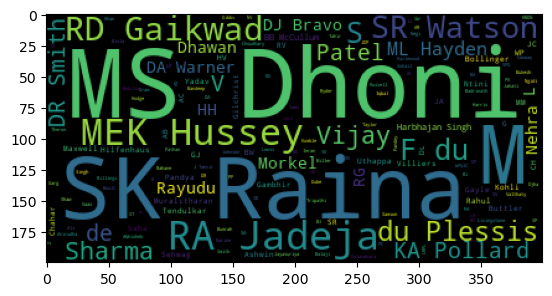

In [111]:
wc_text = " ".join(team_df["Player_of_Match"])
from wordcloud import WordCloud
wc = WordCloud().generate(wc_text)
import matplotlib.pyplot as plt
plt.imshow(wc)

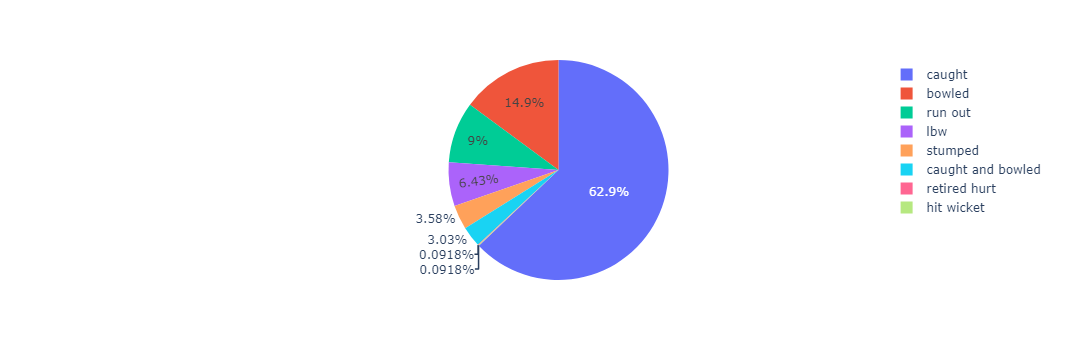

In [117]:
temp = balls_df["kind"].dropna().value_counts().reset_index()
px.pie(data_frame=temp, names="index", values="kind")

In [67]:
matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [68]:
balls.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')